In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [60]:
def ACO(path, iterations, totalAnts=20, a=1, B=3, r=0.8):
    # Intitializing a non-directed graph graph
    f = open(path)
    line = f.readline().split()
    totalNodes = int(line[2])
    graph = {}
    for _ in range(int(line[3])):
        line = f.readline().split()
        key = int(line[1])
        vertex = graph.get(key, [])
        vertex.append(int(line[2]))
        graph[key] = vertex
        key = int(line[2])
        vertex = graph.get(key, [])
        vertex.append(int(line[1]))
        graph[key] = vertex

    # Intitializing needed arrays and variables
    average, best = [], []
    nColsMin = 0
    nodes = sorted(list(graph.keys()))
    colors = [len(graph[key]) for key in graph.keys()]

    adjMatrix = np.zeros((totalNodes, totalNodes), float)
    for node in nodes:
        for adj in graph[node]:
            # Ensuring 0-indexing
            nodeIdx = node - 1
            adjIdx = adj - 1
            adjMatrix[nodeIdx][adjIdx] = 1

    # Creating matrix representation of pheromone trail
    trail = np.ones((totalNodes, totalNodes), float)
    for node in nodes:
        for adj in graph[node]:
            # Ensuring 0-indexing
            nodeIdx = node - 1
            adjIdx = adj - 1
            trail[nodeIdx][adjIdx] = 0

    # Running ACO for "iterations" iterations
    for _ in range(iterations):
        ants = []
        for _ in range(totalAnts):
            ants.append(Ant(graph, trail,
                            adjMatrix, colors, a, B))
        for ant in ants:
            ant.selection(adjMatrix)

        # Figuring out elite candidate and elite pheromone trail
        nCols = 0
        elite = None

        for ant in ants:
            if (nCols > ant.dist or nCols == 0):
                nCols = ant.dist
                elite = ant

        eTrail = np.zeros((elite.totalNodes, elite.totalNodes), float)

        for key1 in elite.graph.keys():
            for key2 in elite.graph.keys():
                if elite.pickedColors[key1] == elite.pickedColors[key2]:
                    # Ensuring 0-indexing
                    idx1 = key1 - 1
                    idx2 = key2 - 1
                    eTrail[idx1][idx2] = 1

        # Evaporation of trail
        for node in nodes:
            for adj in nodes:
                # Ensuring 0-indexing
                nodeIdx = node - 1
                adjIdx = adj - 1
                trail[nodeIdx][adjIdx] = r * trail[nodeIdx][adjIdx]
        
        trail = np.add(trail, eTrail)

        if (nColsMin == 0 or elite.dist < nColsMin):
            nColsMin = elite.dist
        
        # Calculating color average
        colAvg = sum([ant.dist for ant in ants])/totalAnts
        
        # Updating average and best arrays
        average.append(colAvg)
        best.append(elite.dist)

    # Plotting average values
    plt.plot(average)
    plt.xlabel("Total Iterations")
    plt.ylabel("Total Colors")
    plt.title("Iteration vs Average fitness so far")
    plt.show()
    
    # Plotting best values
    plt.plot(best)
    plt.xlabel("Total Iterations")
    plt.ylabel("Total Colors")
    plt.title("Iteration vs Best fitness so far")
    plt.show()
    
    return nColsMin

In [61]:
class Ant:
    def __init__(self, graph, adjMatrix, pMatrix, colors, a, B):
        self.a = a
        self.B = B
        self.dist = 0
        self.visited = []
        self.adjMatrix = adjMatrix
        self.trail = pMatrix
        self.colors = colors
        self.pickedColors = {}
        self.origin = None
        self.graph = graph
        self.totalNodes = len(list(self.graph.keys()))
        
        # Creating an array of unvisited nodes
        keys = list(self.graph.keys())
        self.unvisited = keys
        
        # Intializing array to assign colors to nodes
        for key in keys:
            self.pickedColors[key] = None
        
        # Initializing starting point of the graph
        if self.origin == None:
            self.origin = random.choice(keys)

        # Traversing the graph and assigning colors
        if len(self.visited) == 0:
            self.pickedColors[self.origin] = self.colors[0]
            self.visited.append(self.origin)
            self.unvisited.remove(self.origin)

    def selection(self, adjMatrix):
        totalUnvisited = len(self.unvisited)
        
        # Selecting canditate
        for i in range(totalUnvisited):
            if totalUnvisited == 0:
                candidate = None
            elif totalUnvisited == 1:
                candidate = self.unvisited[0]
            else:
                candidates = []
                probabilities = []
                
                for node in self.unvisited:
                    if node == None:
                        node = self.origin
                    
                    # Selecting pheromone, a unique color, and calculating probability
                    pheromone = self.trail[self.origin-1][node-1]
                    newColor = len(set(
                        [self.pickedColors[i+1] for i in range(self.totalNodes) if self.adjMatrix[node-1][i] == 1]))
                    probability = pheromone**self.a * newColor**self.B
                    
                    candidates.append(node)
                    probabilities.append(probability)

                candidate = random.choice([candidates[i] for i in range(
                    len(candidates)) if probabilities[i] >= max(probabilities)])

            adjColors = [self.pickedColors[j+1]
                     for j in range(self.totalNodes) if adjMatrix[candidate-1][j] == 1]
            
            # Ensuring distinct color assignment
            for k in self.colors:
                if k not in adjColors:
                    self.pickedColors[candidate] = k
                    self.visited.append(candidate)
                    self.unvisited.remove(candidate)
                    break
                    
            self.origin = candidate

        self.dist = len(set(self.pickedColors.values()))

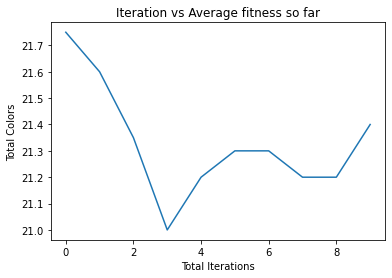

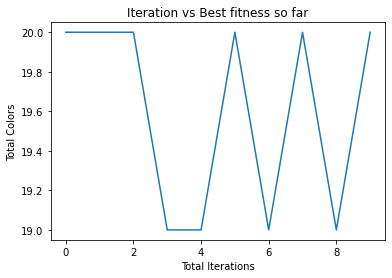

19


In [63]:
random.seed(0)
print(ACO("gcol1.txt", 10, totalAnts=20, a=1, B=3, r=0.8))

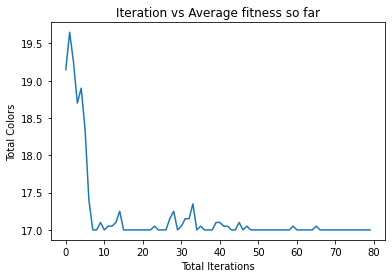

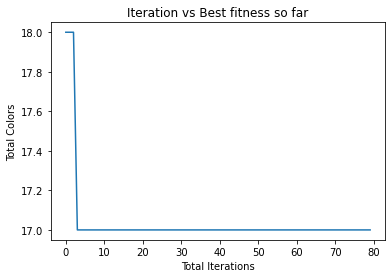

17


In [26]:
random.seed(0)
print(ACO("gcol1.txt", 80, totalAnts=20, a=0.8, B=0.9, r=0.9))

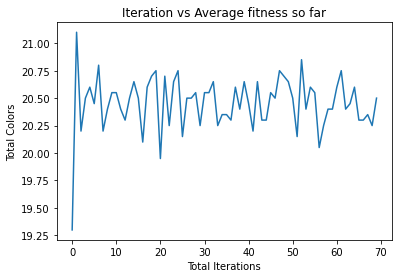

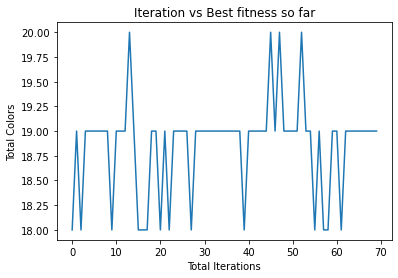

18


In [17]:
random.seed(0)
print(ACO("gcol1.txt", 70, totalAnts=20, a=1, B=3, r=0.8))

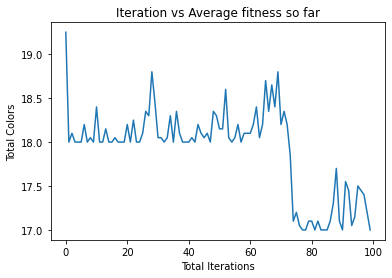

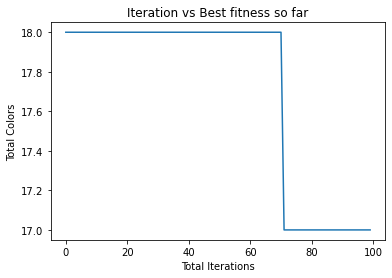

17


In [13]:
random.seed(0)
print(ACO("gcol1.txt", 80, totalAnts=20, a=0.6, B=0.4, r=0.8))

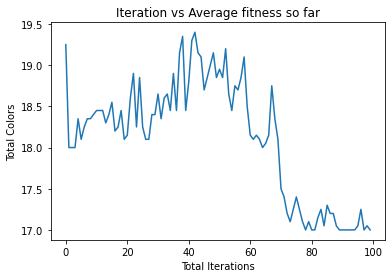

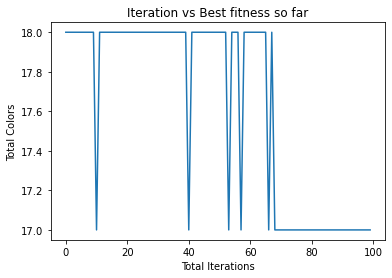

17


In [14]:
random.seed(0)
print(ACO("gcol1.txt", 80, totalAnts=20, a=0.6, B=0.7, r=0.8))

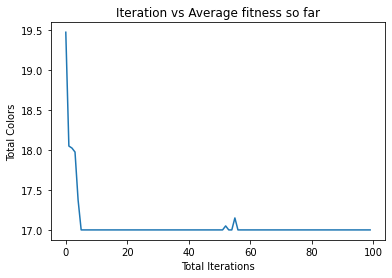

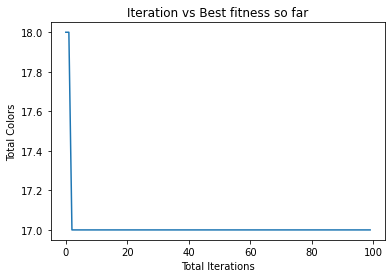

17


In [16]:
random.seed(0)
print(ACO("gcol1.txt", 80, totalAnts=40, a=0.5, B=0.4, r=0.8))